# 1. Load libraries and modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os
import sys
import json
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/phaxssi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/phaxssi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
sys.path.append(os.path.abspath('../funcs'))
import functions as fn

/home/phaxssi/miniconda3/envs/rag/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Set Configuration

In [3]:
# Load the config
with open("../config/config.json", "r") as f:
    config = json.load(f)

# Load the model mapping
with open('../config/models_mapping.json', 'r') as f:
    model_mapping = json.load(f)

# Set up the stride
stride = config['globals']['stride']

# Set the output path
plot_output_path = config['plots']['output_path']
os.makedirs(plot_output_path, exist_ok=True)

# 3. Plots

### 3.1. Accuracy Plot

In [4]:
metric_name = 'EM - 2V'
noise_thresholds = fn.get_noise_levels(stride)
ext_file_path = '../metrics/ext/final_metrics.xlsx'
gen_file_path = '../metrics/gen/final_metrics.xlsx'

ext_data = fn.extract_metrics_from_excel(ext_file_path, metric_name, model_mapping, noise_thresholds)
gen_data = fn.extract_metrics_from_excel(gen_file_path, metric_name, model_mapping, noise_thresholds)

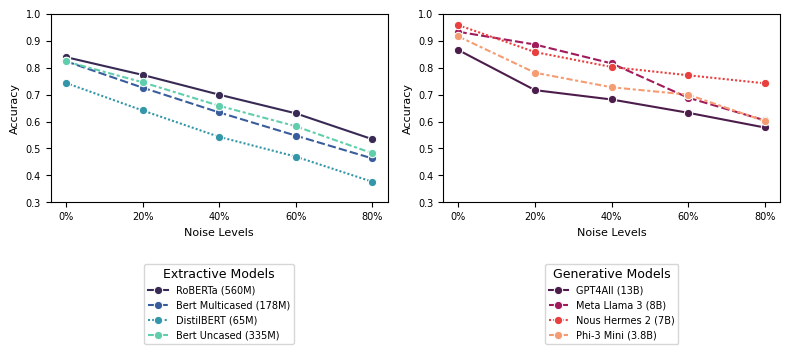

In [5]:
ext_df_filtered = ext_data.drop('100%')
gen_df_filtered = gen_data.drop('100%')

fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True)
palette_gen = sns.color_palette("mako", len(gen_df_filtered.columns))
palette_ext = sns.color_palette("rocket", len(ext_df_filtered.columns))

sns.lineplot(ax=axes[0], data=ext_df_filtered, palette=palette_gen, marker='o')
axes[0].set_xlabel('Noise Levels', fontsize=8)
axes[0].set_ylabel('Accuracy', fontsize=8)
axes[0].legend(title='Extractive Models', loc='upper center', bbox_to_anchor=(0.5, -0.3), fontsize=7, title_fontsize=9, frameon=True)
axes[0].tick_params(axis='x', labelsize=7)
axes[0].tick_params(axis='y', labelsize=7)
axes[0].set_ylim(0.3, 1)

sns.lineplot(ax=axes[1], data=gen_df_filtered, palette=palette_ext, marker='o')
axes[1].set_xlabel('Noise Levels', fontsize=8)
axes[1].set_ylabel('Accuracy', fontsize=8)
axes[1].legend(title='Generative Models', loc='upper center', bbox_to_anchor=(0.5, -0.3), fontsize=7, title_fontsize=9, frameon=True)
axes[1].tick_params(axis='x', labelsize=7)
axes[1].tick_params(axis='y', labelsize=7)
axes[1].set_ylim(0.3, 1)

plt.tight_layout()
filepath = os.path.join(plot_output_path, f"{metric_name}.png")
plt.savefig(filepath, format='jpg', dpi=500)
plt.show()

### 3.2. All metrics plot

In [6]:
input_files = '../results/ext/'
ext_average_df = fn.get_average_metrics(input_files, model_mapping)
noise_columns = ['Metric'] + [f'{noise_label}_Mean' for noise_label in noise_thresholds.keys()]
new_column_names = ['Metric'] + [f'{int(noise_level * 100)}%' for noise_level in noise_thresholds.values()]
rename_dict = {'EM - 2V': 'Accuracy'}

/home/phaxssi/GitHub/Towards_Optimal_RAG/funcs/functions.py:648: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  mean_df = concatenated_df.groupby(level=0, axis=1).mean()
/home/phaxssi/GitHub/Towards_Optimal_RAG/funcs/functions.py:648: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  mean_df = concatenated_df.groupby(level=0, axis=1).mean()
/home/phaxssi/GitHub/Towards_Optimal_RAG/funcs/functions.py:648: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  mean_df = concatenated_df.groupby(level=0, axis=1).mean()
/home/phaxssi/GitHub/Towards_Optimal_RAG/funcs/functions.py:648: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  mean_df = concatenated_df.groupby(level=0, axis=1).mean()


In [7]:
df_ext = pd.read_excel('../metrics/ext/final_metrics.xlsx', sheet_name='RoBERTa (560M)')
df_ext = df_ext[noise_columns]
df_ext.columns = new_column_names
df_ext = df_ext.set_index('Metric')
df_ext = df_ext.rename(index=rename_dict)
df_ext = df_ext.drop(columns = {'100%'})
df_ext = df_ext.drop('Bleu')
df_ext = df_ext.drop('EM - String')

df_gen = pd.read_excel('../metrics/gen/final_metrics.xlsx', sheet_name='Nous Hermes 2 (7B)')
df_gen = df_gen[noise_columns]
df_gen.columns = new_column_names
df_gen = df_gen.set_index('Metric')
df_gen = df_gen.rename(index=rename_dict)
df_gen = df_gen.drop(columns = {'100%'})
df_gen = df_gen.drop('Bleu')
df_gen = df_gen.drop('EM - String')

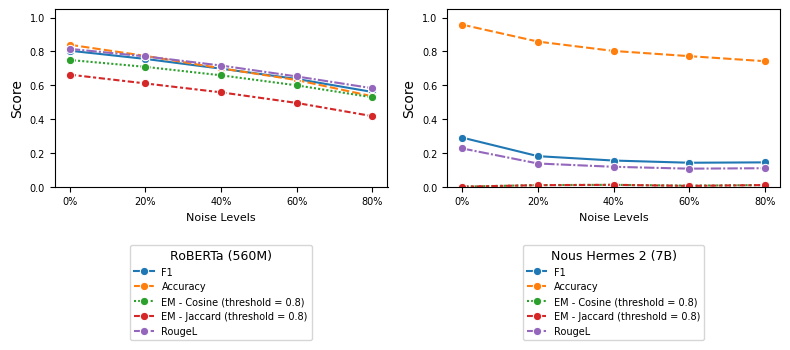

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True)
palette = sns.color_palette("tab10", n_colors=len(df_gen.columns))

sns.lineplot(data=df_ext.T, ax=axes[0], palette=palette, marker='o')
axes[0].set_ylabel('Score', fontsize=10)
axes[0].set_xlabel('Noise Levels', fontsize=8)
axes[0].legend(title='RoBERTa (560M)', loc='upper center', bbox_to_anchor=(0.5, -0.3), fontsize=7, title_fontsize=9, frameon=True)
axes[0].tick_params(axis='x', labelsize=7)
axes[0].tick_params(axis='y', labelsize=7)
axes[0].set_ylim(0, 1.05)

sns.lineplot(data=df_gen.T, ax=axes[1], palette=palette, marker='o')
axes[1].set_ylabel('Score', fontsize=10)
axes[1].set_xlabel('Noise Levels', fontsize=8)
axes[1].legend(title='Nous Hermes 2 (7B)', loc='upper center', bbox_to_anchor=(0.5, -0.3), fontsize=7, title_fontsize=9, frameon=True)
axes[1].tick_params(axis='x', labelsize=7)
axes[1].tick_params(axis='y', labelsize=7)
axes[1].set_ylim(0, 1.05)

plt.tight_layout()
filepath = os.path.join(plot_output_path, f"{metric_name}.png")
plt.savefig(filepath, format='jpg', dpi=500)
plt.show()